# Wildcode School_ Project 2 - Halil & Mai
# Movies Recommendation System_ Part 1
# Exploration and preprocessing 


In this project, we worked on 7 mass datasets of more than 10 millions titles about movies, tvshow, videos, etc.  Dealing with files that are too large in size, we could not import all the datasets at the same time, there was no other option than mining 1 or 2 dataset each time.

In addition, according to our client's expectation, we had to create this system for a particular target of users in a sparsely populated place where elderly population occupates almost 60%.

You can find the source of all the dataset here "https://datasets.imdbws.com/"

# 1. Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


#

# 1.1 Analyzing the dataset 'title.rating.tsv'

This dataset is about the average ratings and the numbers of votes of  id which represents each movie/tvshow/video/short.

First, let's look at the column 'numVotes', statistically we notice that 75% of the dataset is occupied by the values below 250 numbers of vote which may give the impression that there are 75% of the movies and tvshows are very little popular. If we visualize the distribution of each movie's frequency, we can not see much because of a massive distribution in the interval 5 and less than 500 numbers of votes while the maximum number is 2.888.676.

In [2]:
rating = pd.read_csv('title.ratings.tsv', sep = '\t')
print('Stats of Votes numbers: ', rating['numVotes'].describe())

Stats of Votes numbers:  count    1.432130e+06
mean     1.032975e+03
std      1.768055e+04
min      5.000000e+00
25%      1.100000e+01
50%      2.600000e+01
75%      1.010000e+02
max      2.888676e+06
Name: numVotes, dtype: float64


Now, let's show it out by ploting a boxplot to see a litte bit clearer the distribution of this column (below graphique). We can observe clearly that 90% number of votes is less than 1500 votes in the dataset while the maximum number of votes almost touches 2.900. Apparently there is a very big gap between the popular movies and tvshows and less popular ones. But, because we don't have enough information about the movie preferences of our users, which are related to its popularity, we decided not to limit this column.



0.0          5.0
0.1          7.0
0.2         10.0
0.3         13.0
0.4         18.0
0.5         26.0
0.6         40.0
0.7         71.0
0.8        149.0
0.9        476.0
1.0    2888676.0
Name: numVotes, dtype: float64 






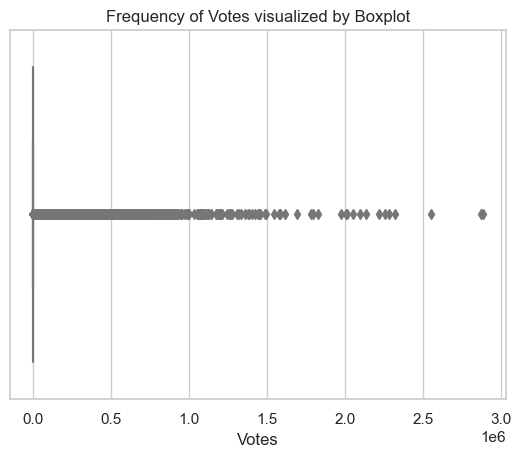

In [4]:
# The 9 deciles + min + max of the column 'numVotes'
print( rating['numVotes'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n\n\n')

sns.set(style='whitegrid')
sns.set_palette('Paired')
ax = sns.boxplot(rating, x='numVotes')
ax.set_title("Frequency of Votes visualized by Boxplot")
ax.set_xlabel("Votes")
plt.show();

Then, we head to the statistics of the 'averageRating', we can say that most of the data distributes in the interval between 5 and 9, but its 9 deciles point out that 90% of the dataset have a rate note higher than 5. Maybe we can choose this condition to remove some outliers of the dataset.

0.0     1.0
0.1     5.2
0.2     5.9
0.3     6.4
0.4     6.8
0.5     7.1
0.6     7.4
0.7     7.7
0.8     8.1
0.9     8.5
1.0    10.0
Name: averageRating, dtype: float64 





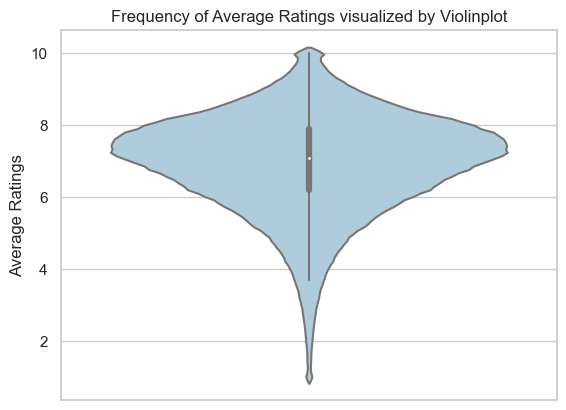

In [6]:
# Check the distribution in 10 quantiles of averageRating

print( rating['averageRating'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n\n')

ax = sns.violinplot(rating, y='averageRating')
ax.set_title("Frequency of Average Ratings visualized by Violinplot")
ax.set_ylabel("Average Ratings")
plt.show();

Here, we tried to look for a correlation between  Votes and number of votes and we see that there is polynomial regression which is very light but because of the massive outliers we can not point it out clearly.
However, we can observe that the films which have a high number of votes will tend to have high score.
Because the bad notes which are less than 5 occurence in just the first quantile of the dataset, we decide to remove this partie to keep only films with notes above 5.


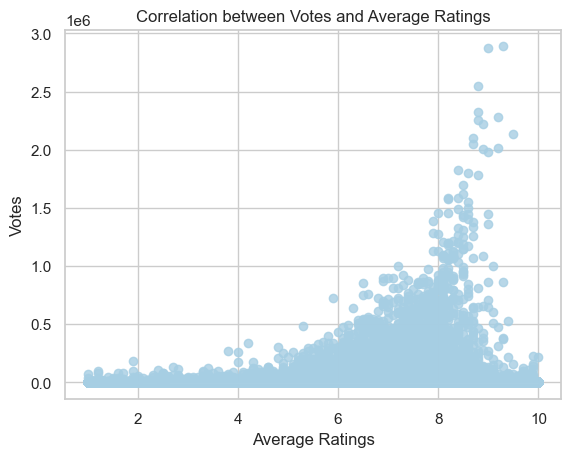

In [7]:
# There is a correlation between Average Rating and Number of Votes or not?
ax = sns.regplot(x = 'averageRating', 
            y = 'numVotes', 
            data = rating,  
            order=2)
ax.set_title("Correlation between Votes and Average Ratings")
ax.set_xlabel("Average Ratings")
ax.set_ylabel("Votes")
plt.show();

We tried to filter the titles having numVotes higher than 500.000 to se what would happen. Movies which have a high number of Votes will also have a good rating.


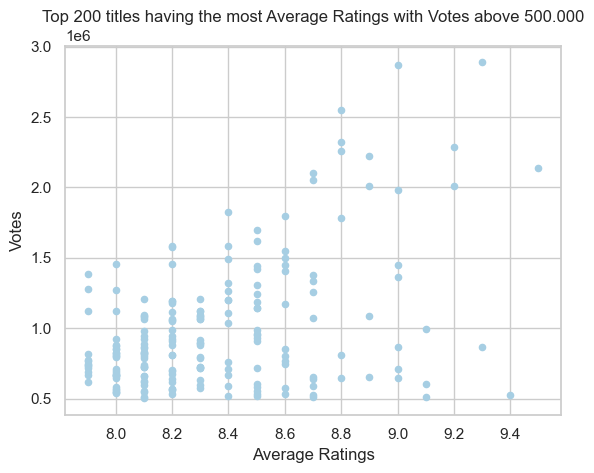

In [8]:
# plot 200 popular titles
# Filter dataset and plot 
df = rating.loc[rating['numVotes'] > 500000].sort_values(['averageRating', 'numVotes'], ascending= False).head(200)

sns.set(style='whitegrid')
sns.set_palette('Paired')
ax = df.plot(kind='scatter', 
             y='numVotes', 
             x='averageRating', 
             title='Top 200 titles having the most Average Ratings with Votes above 500.000')
ax.set_xlabel("Average Ratings")
ax.set_ylabel("Votes")
plt.show();

# 

# 1.2 Analyzing the dataset 'title.akas'

In [2]:
title_akas = pd.read_csv('title.akas.tsv', sep = '\t', na_values='\\N')
title_akas.head()

C:\Users\vestr\AppData\Local\Temp\ipykernel_756\684394869.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  title_akas = pd.read_csv('title.akas.tsv', sep = '\t', na_values='\\N')


titleId  ordering                      title region language  \
0  tt0000001         1                 Carmencita    NaN      NaN   
1  tt0000001         2                 Carmencita     DE      NaN   
2  tt0000001         3                 Carmencita     US      NaN   
3  tt0000001         4  Carmencita - spanyol tánc     HU      NaN   
4  tt0000001         5                 Καρμενσίτα     GR      NaN   

         types     attributes  isOriginalTitle  
0     original            NaN                1  
1          NaN  literal title                0  
2  imdbDisplay            NaN                0  
3  imdbDisplay            NaN                0  
4  imdbDisplay            NaN                0

We normalized the values of all the columns and projected them into bar chart to see which columns are impossible to be used. Apparently, we only have 4 columns which could be useful, so we tried to count the frequency of each 'titleId' for the 'numLanguages' and we noticed that 50% titles of the dataset have less than 20 linguistic versions including the original version.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48134030 entries, 0 to 48134029
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 2.9+ GB
General info: None 


Unique values of column 'isOriginal' [1 0] 


Percentage of missing values in Dataframe
                      column_name  percent_missing
titleId                  titleId         0.000000
ordering                ordering         0.000000
title                      title         0.000069
region                    region        22.429873
language                language        33.064990
types                      types        69.262378
attributes            attributes        99.421985
isOriginalTitle  isOriginalTitle   

Text(0.5, 1.0, 'Percentage of missing values in Dataframe')

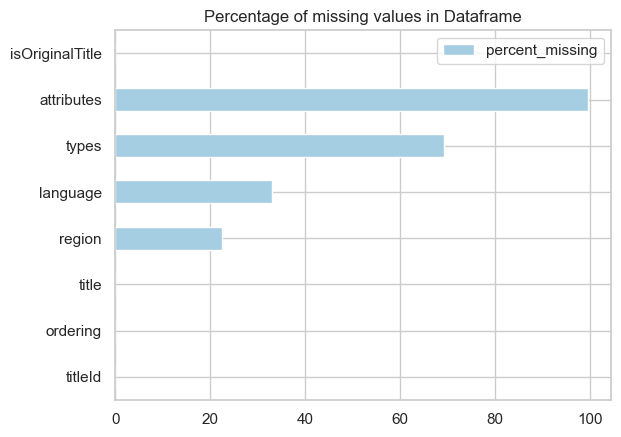

In [12]:
# Check missing values by changing the scale into percentage

percent_missing = title_akas.isnull().sum() * 100 / len(title_akas)
missing_value_df = pd.DataFrame({'column_name': title_akas.columns,
                                 'percent_missing': percent_missing})

print('General info:', title_akas.info(), '\n\n')
print("Unique values of column 'isOriginal'", title_akas['isOriginalTitle'].unique(), '\n\n')
print("Percentage of missing values in Dataframe\n", missing_value_df, '\n\n')

missing_value_df.plot(kind='barh').set_title("Percentage of missing values")

Stats of numbers of languages
 count    1.071792e+07
mean     4.490987e+00
std      3.712500e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      8.000000e+00
max      2.510000e+02
Name: numLanguages, dtype: float64 


List of numbers of languages
 [  8   9  12   6  10  11   5  25   3  28  14  24  13   2  16   4  17   7
  18  49  29  21  19  15  26   1  22  23  30  20  40  27  31  32  41  37
  38  33  36  39  35  43  48  34  57  42  46  62  45  47  66  52  55  44
  50  54  59  63  51  70  87  53  58  78  73  67  79  61  64  60  56  68
  72  69  65  76  75  80  71  74  85 101  88  95  81  84  92  93 118  99
  86  82 104  89 251 107 100  77 145  91 133  83 205 120 117 127 165  97
 161  90 137 150  96 105  98 112] 




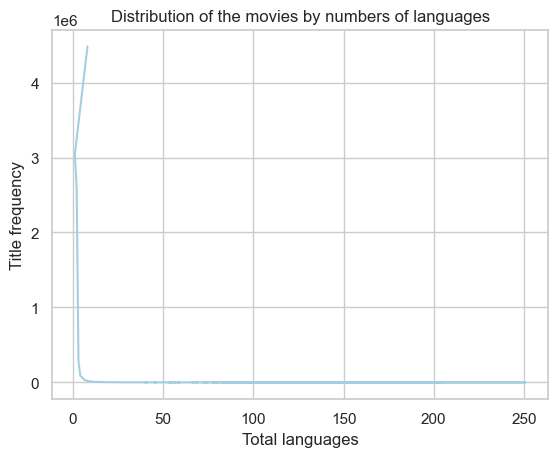

In [4]:
# Groupby and count the number of rows of each titleId
akas_bg = pd.DataFrame()
akas_bg[['titleId', 'numLanguages']] = title_akas.groupby(['titleId']).size().reset_index()

print('Stats of numbers of languages\n', akas_bg['numLanguages'].describe(), '\n\n')
print('List of numbers of languages\n', akas_bg['numLanguages'].unique(), '\n\n')

# Line plot to show the evolution of the numbers of linguistic versions
sns.set(style='whitegrid')
sns.set_palette('Paired')
ax = akas_bg['numLanguages'].value_counts().plot(
                                   kind='line'
                                            )
ax.set_title("Distribution of the movies by numbers of languages")
ax.set_xlabel("Total languages")
ax.set_ylabel("Title frequency")
plt.show();

Then, we tried to identify the original language in the hope that we can use this feature, but the result is 100% null. So we choose to give up on this dataset.

In [19]:
akas_original = title_akas[title_akas['isOriginalTitle'] == 1]
print('Percentage of missing values in column Region\n', akas_original['region'].isnull().sum()*100/len(akas_original), '\n\n')
akas_original.head(5)

Percentage of missing values in column Region
 100.0 




titleId  ordering                   title region language     types  \
0   tt0000001         1              Carmencita    NaN      NaN  original   
8   tt0000002         1  Le clown et ses chiens    NaN      NaN  original   
16  tt0000003         1          Pauvre Pierrot    NaN      NaN  original   
25  tt0000004         1             Un bon bock    NaN      NaN  original   
33  tt0000005         1        Blacksmith Scene    NaN      NaN  original   

   attributes  isOriginalTitle  
0         NaN                1  
8         NaN                1  
16        NaN                1  
25        NaN                1  
33        NaN                1

# 

# 1.3 Analyzing the dataset 'title.crew'

In [3]:
title_crew = pd.read_csv('title.crew.tsv', sep = '\t', na_values='\\N')

# Replace the null values by '0' 
title_crew.loc[title_crew['directors'].isnull(), 'directors'] = '0'
title_crew.loc[title_crew['writers'].isnull(), 'writers'] = '0'

# Apply the condition to saperate the columns with more than 2 values into list
title_crew['numDirectors'] = title_crew['directors'].apply(lambda x: 0 if x == '0' else len(x.split(',')))
title_crew['numWriters'] = title_crew['writers'].apply(lambda x: 0 if x == '0' else len(x.split(',')))

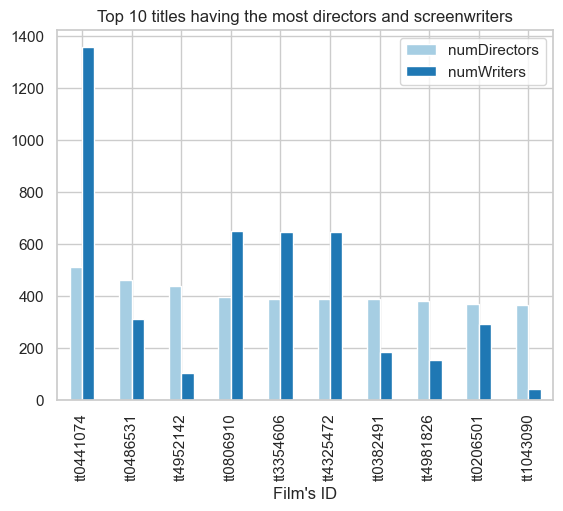

In [7]:
# Top 10 titles having the most directors and writers
df = title_crew.sort_values(['numDirectors', 'numWriters'], ascending= False).head(10)

# Bar plot to compare and observe the distribution
# Found a title with more than 1300 writers and 500 diretors
# All of these titles should belong to the type tvSeries
sns.set(style='whitegrid')
sns.set_palette('Paired')
ax = df.plot(kind='bar', x='tconst', 
             title='Top 10 titles having the most directors and screenwriters')
ax.set_xlabel("Film's ID")
plt.show();

We want to check there is how many percent of titles which don't have a director or a writer. Then, we wonder why?? Because there are many self-made video/short so they don't mention writer or director.

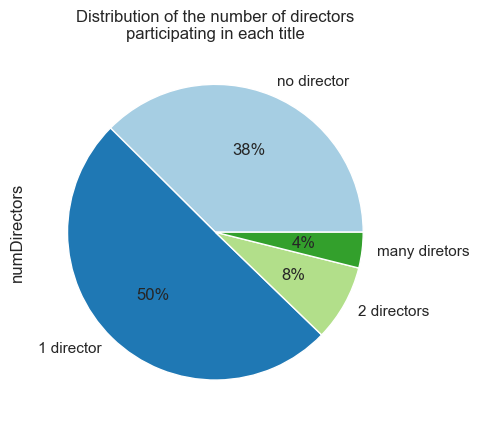

In [5]:
# Create groups by custome 
bin_ranges = [-1, 0, 1, 2, 509]
bin_names = ['no director', '1 director', '2 directors', 'many diretors']

title_crew['bin_ranges'] = pd.cut(np.array(title_crew['numDirectors']), 
                                  bins=bin_ranges)
title_crew['bin_label'] = pd.cut(np.array(title_crew['numDirectors']), 
                                 bins=bin_ranges,            
                                 labels=bin_names)

# Pie plot to see occurence in percentage of each customized group
sns.set(style='whitegrid')
sns.set_palette('Paired')
title_crew[['numDirectors', 
            'bin_label']].groupby(['bin_label']).count().plot(
                                                            kind='pie', 
                                                            y='numDirectors',
                                                            autopct='%1.0f%%',
                                                            legend=False,
                                                            title = 'Distribution of the number of directors\nparticipating in each title')
plt.show();

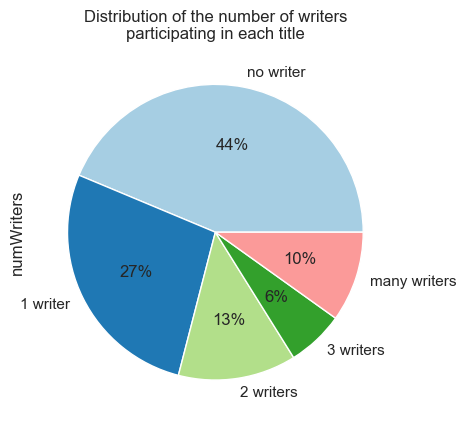

In [6]:
bin_ranges_w = [-1, 0, 1, 2, 3, 509]
bin_names_w = ['no writer', '1 writer', '2 writers', '3 writers', 'many writers']

title_crew['bin_ranges_w'] = pd.cut(np.array(title_crew['numWriters']), 
                                    bins=bin_ranges_w)
title_crew['bin_label_w'] = pd.cut(np.array(title_crew['numWriters']), 
                                   bins=bin_ranges_w,            
                                   labels=bin_names_w)

title_crew[['numWriters', 'bin_label_w']].groupby(['bin_label_w']).count().plot(kind='pie', 
                                                                              y='numWriters',
                                                                              autopct='%1.0f%%',
                                                                              legend=False,
                                                                              title = 'Distribution of the number of writers\nparticipating in each title')
plt.show();

#

# 1.4 Analyzing the dataset 'title.episode'

In [2]:
episode = pd.read_csv('title.episode.tsv', 
                      sep = '\t', 
                      na_values=['\\N', 'nan'])

ep_count = episode.groupby(['parentTconst', 
                        'seasonNumber']).agg(**{
                                            'totalEpisode': ('tconst', lambda x: x.count()),
                                            'epId' : ('tconst', lambda x: ','.join(x))
                                                      }).reset_index()
ep_count.head()

parentTconst  seasonNumber  totalEpisode  \
0    tt0035599           1.0             1   
1    tt0035803           6.0             6   
2    tt0038276           1.0             1   
3    tt0039120           1.0             1   
4    tt0039122           1.0             5   

                                                epId  
0                                         tt24373634  
1  tt31052122,tt31052438,tt31052568,tt31080456,tt...  
2                                         tt13642462  
3                                         tt12505654  
4  tt1231645,tt13711232,tt2086703,tt2093825,tt477...

0.0       1.0
0.1       1.0
0.2       1.0
0.3       1.0
0.4       1.0
0.5       1.0
0.6       2.0
0.7       2.0
0.8       4.0
0.9       8.0
1.0    2024.0
Name: seasonNumber, dtype: float64 





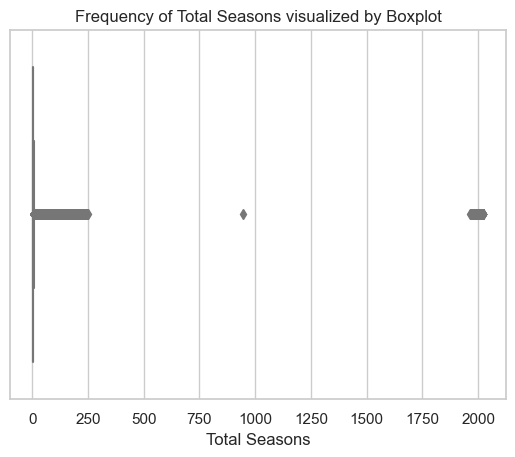

In [3]:
print( ep_count['seasonNumber'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n\n')

sns.set(style='whitegrid')
sns.set_palette('Paired')

ax = sns.boxplot(ep_count, x='seasonNumber')
ax.set_title("Frequency of Total Seasons visualized by Boxplot")
ax.set_xlabel("Total Seasons")
plt.show();

In [5]:
# List of 104 tries with seasonNumbers chosen by the number of years
s_2000 = ep_count.loc[ep_count['seasonNumber'] > 1990]
print('Count of unique value\n', s_2000.seasonNumber.value_counts(), '\n\n')
s_2000

Count of unique value
 seasonNumber
2008.0    9
2009.0    9
2021.0    8
2013.0    7
2007.0    7
2006.0    5
2012.0    4
2017.0    4
2019.0    4
2015.0    3
1998.0    3
2010.0    3
2020.0    3
2011.0    3
1992.0    3
2018.0    2
1991.0    2
2004.0    2
2003.0    2
2002.0    2
2000.0    2
1999.0    2
1997.0    2
1996.0    2
1995.0    2
1994.0    2
1993.0    2
2014.0    2
2005.0    1
2016.0    1
2024.0    1
Name: count, dtype: int64 




parentTconst  seasonNumber  totalEpisode  \
2719      tt0057775        1991.0             5   
2720      tt0057775        1992.0             4   
2721      tt0057775        1993.0             4   
2722      tt0057775        1994.0             3   
2723      tt0057775        1995.0             5   
...             ...           ...           ...   
293866    tt7896644        2019.0             1   
308084    tt9139576        2017.0             1   
308085    tt9139576        2018.0             3   
308086    tt9139576        2019.0             3   
311162    tt9444742        2021.0             1   

                                                     epId  
2719    tt1057238,tt27505699,tt27505708,tt6237050,tt88...  
2720           tt0955705,tt27505713,tt27505716,tt27505719  
2721            tt0146296,tt1925476,tt27506964,tt27506972  
2722                      tt2408358,tt27506982,tt27507104  
2723    tt27439995,tt27507227,tt27507236,tt27507243,tt...  
...                                                   ...  
293866                                         tt11481942  
308084                                          tt9521320  
308085                      tt9139676,tt9198076,tt9490998  
308086                   tt11132280,tt11132294,tt11132594  
311162                                         tt13840622  

[104 rows x 4 columns]

In [45]:
# One weird tvseries from the dataset
s_1000 = ep_count.loc[(ep_count['seasonNumber'] > 750) & (ep_count['seasonNumber'] < 1000)]
tt2876418 = ep_count.loc[ep_count['parentTconst'] == 'tt2876418'][['parentTconst', 'seasonNumber', 'totalEpisode']]
print('Intruder of the list\n', s_1000, '\n\n')
print('All seasons of this tvSeries\n', tt2876418)
      


Intruder of the list
        parentTconst  seasonNumber  totalEpisode        epId
209683    tt2876418         947.0             1  tt13358640 


All seasons of this tvSeries
        parentTconst  seasonNumber  totalEpisode
209674    tt2876418           1.0           262
209675    tt2876418           2.0           166
209676    tt2876418           3.0           350
209677    tt2876418           4.0           202
209678    tt2876418           5.0           163
209679    tt2876418           6.0           200
209680    tt2876418           7.0           191
209681    tt2876418           8.0           168
209682    tt2876418           9.0           154
209683    tt2876418         947.0             1


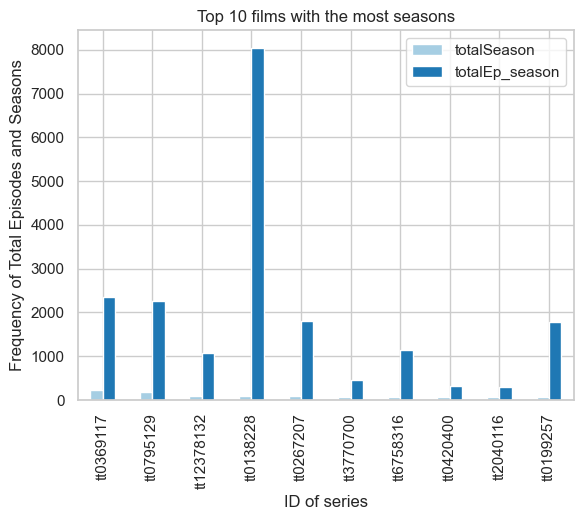

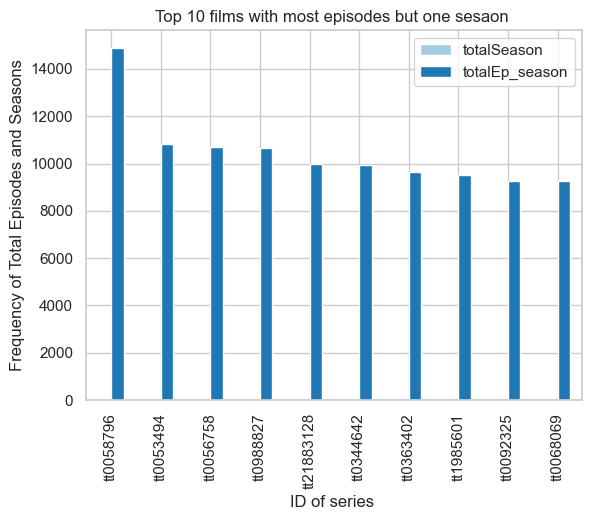

In [6]:
# tvSeries with most episodes from all seasons
f1 = (~ep_count['parentTconst'].isin(s_2000['parentTconst']))
f2 = ep_count['parentTconst'] != 'tt2876418'
s_max = ep_count[f1&f2]

se_total = s_max.groupby(['parentTconst' 
                        ]).agg(**{
                                            'totalSeason': ('seasonNumber', lambda x: x.count()),
                                            'totalEp_season' : ('totalEpisode', lambda x: x.sum())
                                                      }).reset_index()

se_total_sort = se_total.sort_values(['totalSeason', 'totalEp_season'], ascending= False).head(10)
s_total_sort = se_total.sort_values(['totalSeason'], ascending= False).head(10)
e_total_sort = se_total.sort_values(['totalEp_season'], ascending= False).head(10)
se_less_most = se_total.sort_values(['totalSeason', 'totalEp_season'], ascending= [True, False]).head(10)

s_total_sort.plot(kind='bar', x='parentTconst', 
                  xlabel = "ID of series", ylabel = "Frequency of Total Episodes and Seasons",
                  title='Top 10 films with the most seasons')

se_less_most.plot(kind='bar', x='parentTconst', 
                  xlabel = "ID of series ", ylabel = "Frequency of Total Episodes and Seasons",
                  title='Top 10 films with most episodes but one sesaon ')

plt.show();

#

# 1.5 Analyzing the  dataset 'title.basics'

In [3]:
# We can not go far with this csv if we dont filter it beacuse of a massive outliers from tvEpisode and missing values
# of columns

df = pd.read_csv('title.basics.tsv', sep = '\t', na_values=['\\N', 'nan'])

rate_sup5 = rating.loc[rating['averageRating'] > 5]
df_rated = pd.merge(rate_sup5, df, how='left', on='tconst')

C:\Users\vestr\AppData\Local\Temp\ipykernel_18088\667171040.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('title.basics.tsv', sep = '\t', na_values=['\\N', 'nan'])


Percentage of missing values in Dataframe
                    column_name  percent_missing
tconst                  tconst         0.000000
averageRating    averageRating         0.000000
numVotes              numVotes         0.000000
titleType            titleType         0.000000
primaryTitle      primaryTitle         0.000000
originalTitle    originalTitle         0.000000
isAdult                isAdult         0.000000
startYear            startYear         0.016841
endYear                endYear        96.260703
runtimeMinutes  runtimeMinutes        29.653762
genres                  genres         1.274603 




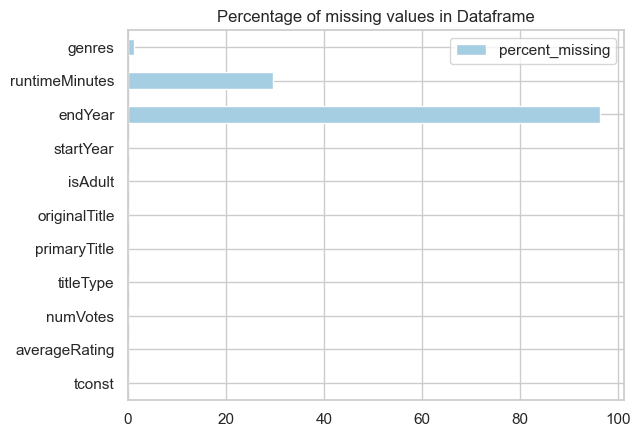

In [4]:
percent_missing = df_rated.isnull().sum() * 100 / len(df_rated)
missing_value_df = pd.DataFrame({'column_name': df_rated.columns,
                                 'percent_missing': percent_missing})

print("Percentage of missing values in Dataframe\n", missing_value_df, '\n\n')

sns.set(style='whitegrid')
sns.set_palette('Paired')
missing_value_df.plot(kind='barh').set_title("Percentage of missing values in Dataframe")
plt.show();

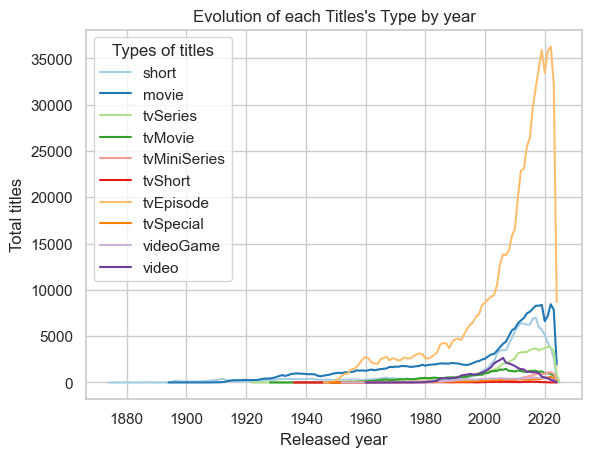

In [5]:
gb = pd.DataFrame({'count' : df_rated.groupby( ['startYear', 'titleType'] ).size()}).reset_index()

sns.set(style='whitegrid')
sns.set_palette('Paired')

ax = sns.lineplot(data = gb, x = 'startYear', y = 'count', hue = 'titleType')
ax.set_title("Evolution of each Titles's Type by year")
ax.set_xlabel("Released year")
ax.set_ylabel("Total titles")
ax.legend(title="Types of titles")
plt.show();

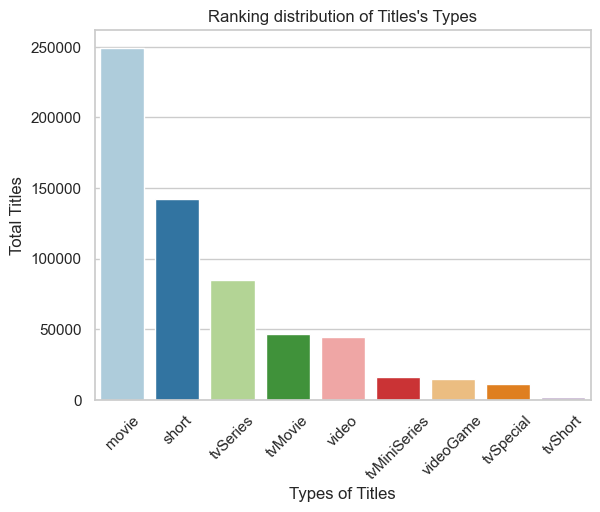

In [6]:
df_ana = pd.DataFrame(df_rated, columns=['tconst', 'titleType', 'startYear', 'runtimeMinutes', 'genres'])
df_ana = df_ana.loc[df_ana['titleType'] != 'tvEpisode']

type_list =  {'runtimeMinutes': float, 'genres': str  }

df_ana= df_ana.astype(type_list)

ax = sns.countplot(data = df_ana, x = 'titleType', 
              order = df_ana['titleType'].value_counts().index)
ax.set_title("Ranking distribution of Titles's Types")
ax.set_xlabel("Types of Titles")
ax.set_ylabel("Total Titles")
plt.xticks(rotation = 45)
plt.show();

0.0      0.0
0.1      4.0
0.2      7.0
0.3      8.0
0.4     10.0
0.5     13.0
0.6     15.0
0.7     18.0
0.8     21.0
0.9     27.0
1.0    121.0
Name: runtimeMinutes, dtype: float64 




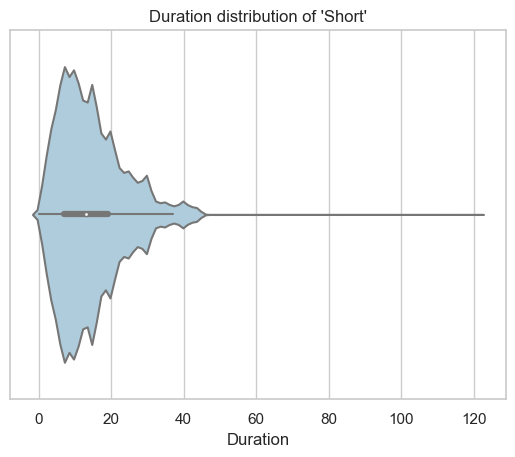

In [7]:
# Working on the motype short

short = df_ana.loc[df_ana['titleType'].isin(['short', 'tvShort'])]

print( short['runtimeMinutes'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

ax = sns.violinplot(short, x='runtimeMinutes')
ax.set_title("Duration distribution of 'Short'")
ax.set_xlabel("Duration")
plt.show();

In [59]:
# Search on website
short_1 = short.loc[short['runtimeMinutes'] == 4]
short_1


tconst titleType  startYear  runtimeMinutes               genres
94       tt0000273     short     1900.0             4.0   Action,Crime,Drama
122      tt0000353     short     1901.0             4.0  Drama,History,Short
137      tt0000387     short     1902.0             4.0        History,Short
143      tt0000409     short     1902.0             4.0         Comedy,Short
147      tt0000416     short     1902.0             4.0          Drama,Short
...            ...       ...        ...             ...                  ...
1298235  tt9853790     short     2019.0             4.0         Horror,Short
1298358  tt9856448     short     2019.0             4.0  Comedy,Sci-Fi,Short
1298401  tt9859272     short     2019.0             4.0                Short
1299030  tt9877664     short     2010.0             4.0      Animation,Short
1299568  tt9893498     short     2019.0             4.0         Horror,Short

[4427 rows x 5 columns]

0.0        1.0
0.1        6.0
0.2       15.0
0.3       29.0
0.4       50.0
0.5       67.0
0.6       80.0
0.7       90.0
0.8      106.0
0.9      135.0
1.0    35791.0
Name: runtimeMinutes, dtype: float64 




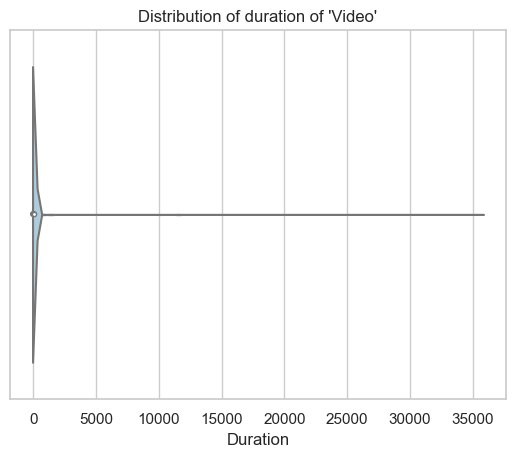

In [8]:
# Working on videos
video = df_ana.loc[df_ana['titleType'].isin(['video', 'videoGame'])]

print( video['runtimeMinutes'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

ax = sns.violinplot(video, x='runtimeMinutes')
ax.set_title("Distribution of duration of 'Video'")
ax.set_xlabel("Duration")
plt.show();

In [34]:
video[video['runtimeMinutes'] == 35791]

tconst titleType  startYear  runtimeMinutes genres
517655  tt12095652     video     2011.0         35791.0    nan

In [53]:
video[video['runtimeMinutes'] > 130]

tconst titleType  startYear  runtimeMinutes            genres
51790    tt0082692     video     1981.0           132.0             Drama
51905    tt0082862     video     1981.0           195.0     Drama,Romance
53151    tt0084596     video     1982.0           172.0               nan
61885    tt0096832     video     1989.0           150.0  Animation,Sci-Fi
62645    tt0097941     video     1989.0           136.0             Adult
...            ...       ...        ...             ...               ...
1299197  tt9881774     video     2007.0           313.0         Animation
1299267  tt9883556     video     2012.0           162.0             Music
1299288  tt9884008     video     2015.0           169.0             Music
1299600  tt9894210     video     2016.0           193.0       Documentary
1299618  tt9894606     video     2016.0           168.0             Music

[4076 rows x 5 columns]

#

# 1.6 Analyzing the dataset 'title.principal'

In [2]:
principal = pd.read_csv('title.principals.tsv', sep = '\t', usecols= ['tconst', 'nconst', 'category'])

In [18]:
principal

tconst     nconst         category
0         tt0000001  nm1588970             self
1         tt0000001  nm0005690         director
2         tt0000001  nm0005690         producer
3         tt0000001  nm0374658  cinematographer
4         tt0000002  nm0721526         director
...             ...        ...              ...
85469220  tt9916880  nm0996406         director
85469221  tt9916880  nm1482639           writer
85469222  tt9916880  nm2586970           writer
85469223  tt9916880  nm1594058         producer
85469224  tt9916880  nm1482639         producer

[85469225 rows x 3 columns]

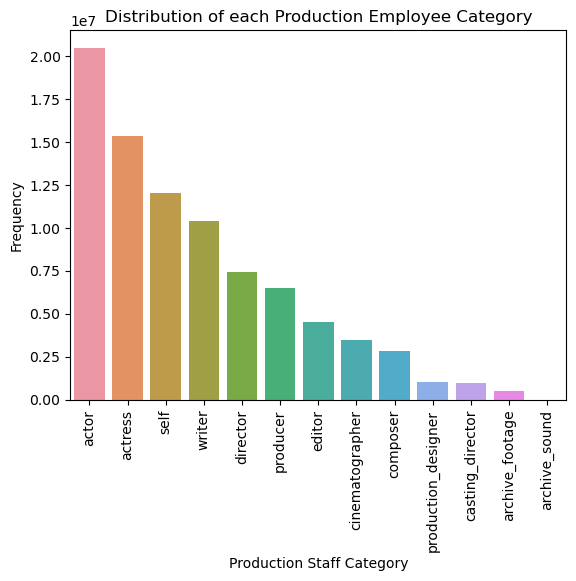

In [4]:
ax = sns.countplot(
            x = principal['category'], 
            order = principal['category'].value_counts().index
              )
ax.set_title("Distribution of each Production Employee Category")
ax.set_xlabel("Production Staff Category")
ax.set_ylabel("Frequency")
plt.xticks(rotation = 90)

plt.show();


In [5]:
crew_top10 = principal['nconst'].value_counts().sort_values(ascending=False).head(10)
lst = ['nm0438471', 'nm0438506', 'nm8467983', 'nm7370686', 'nm0251041', 
       'nm0914844', 'nm6352729', 'nm1203430', 'nm2273814', 'nm5042664' ]
top10 = pd.DataFrame()
top10 = principal.loc[principal['nconst'].isin(lst)]

gb = top10.groupby(['nconst', 'category']).agg(**{
                                                        'numTittles': (
                                                        'tconst', 
                                                         lambda x: x.count())
                                                }).reset_index()

In [6]:
import plotly.express as px
fig = px.treemap(gb, path = ['nconst', 'category'], 
                 values = 'numTittles',  width=800, height=400,
                title = 'Top 10 employees who contributed the most to the arts industry')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(textinfo="label+text+value")
fig.show();

#

# 1.7 Analyzing the dataset 'name.basics'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13453128 entries, 0 to 13453127
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 615.8+ MB
General info: None 


Percentage of missing values in Dataframe
                          column_name  percent_missing
nconst                        nconst         0.000000
primaryName              primaryName         0.000416
birthYear                  birthYear        95.441194
deathYear                  deathYear        98.306446
primaryProfession  primaryProfession        19.179770
knownForTitles        knownForTitles        11.004608 




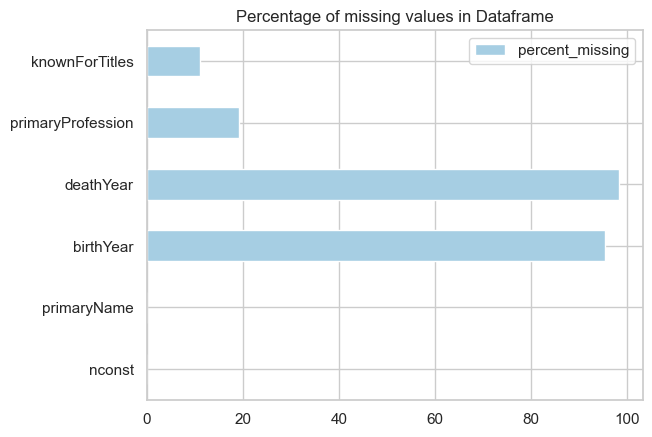

In [6]:
name = pd.read_csv('name.basics.tsv', sep = '\t', na_values=['\\N', 'nan'])

percent_missing = name.isnull().sum() * 100 / len(name)
missing_value_df = pd.DataFrame({'column_name': name.columns,
                                 'percent_missing': percent_missing})

print('General info:', name.info(), '\n\n')
print("Percentage of missing values in Dataframe\n", missing_value_df, '\n\n')

sns.set(style='whitegrid')
sns.set_palette('Paired')
missing_value_df.plot(kind='barh').set_title("Percentage of missing values in Dataframe")
plt.show();

In [5]:
lst = ['nm0438471', 'nm0438506', 'nm8467983', 'nm7370686', 'nm0251041', 
       'nm0914844', 'nm6352729', 'nm1203430', 'nm2273814', 'nm5042664' ]
top10 = pd.DataFrame()
top10 = name.loc[name['nconst'].isin(lst)]

In [6]:
# Name of top 10 working hard for art industry
top10

nconst            primaryName  birthYear  deathYear  \
237791    nm0251041          Michael Egizi        NaN        NaN   
414358    nm0438471            Ekta Kapoor     1975.0        NaN   
414390    nm0438506          Shobha Kapoor        NaN        NaN   
860443    nm0914844             Reg Watson     1926.0     2019.0   
2850082   nm1203430         Johnny Manahan        NaN        NaN   
7078135   nm2273814           Aashish Rego        NaN        NaN   
9511004   nm5042664          Zillur Rahman     1948.0     2011.0   
10580887  nm6352729     Leena Gangopadhyay        NaN        NaN   
11346659  nm7370686  Snehasish Chakraborty        NaN        NaN   
12208745  nm8467983        Saibal Banerjee        NaN        NaN   

                             primaryProfession  \
237791    composer,music_department,soundtrack   
414358                writer,producer,director   
414390                         producer,writer   
860443                writer,producer,director   
2850082          director,writer,miscellaneous   
7078135     composer,sound_department,producer   
9511004                  writer,director,actor   
10580887         writer,miscellaneous,producer   
11346659              writer,producer,composer   
12208745              producer,director,writer   

                                      knownForTitles  
237791       tt0430836,tt0435721,tt0247094,tt0230831  
414358       tt3911870,tt0278212,tt5323298,tt7147670  
414390       tt4434004,tt1954206,tt5323298,tt0278212  
860443       tt0074077,tt0088580,tt0101072,tt0246386  
2850082     tt0380738,tt0363402,tt0360270,tt26775636  
7078135     tt1937092,tt0814012,tt4228746,tt10042074  
9511004      tt6730340,tt6444008,tt7193672,tt4532922  
10580887  tt10940978,tt30705321,tt8211980,tt26687058  
11346659  tt7136974,tt27159524,tt11784978,tt30982648  
12208745  tt6095994,tt10940978,tt14456406,tt26687058

In [7]:
# Creates df without null values of profession and titles
df = name.loc[~name['birthYear'].isnull()]


In [8]:
df

nconst      primaryName  birthYear  deathYear  \
0         nm0000001     Fred Astaire     1899.0     1987.0   
1         nm0000002    Lauren Bacall     1924.0     2014.0   
2         nm0000003  Brigitte Bardot     1934.0        NaN   
3         nm0000004     John Belushi     1949.0     1982.0   
4         nm0000005   Ingmar Bergman     1918.0     2007.0   
...             ...              ...        ...        ...   
13452877  nm9993436   Frank J. Gaily     1915.0     2008.0   
13452957  nm9993526    Ben Ray Lujan     1972.0        NaN   
13452965  nm9993535    Henry Lawfull     2006.0        NaN   
13453086  nm9993675   Ebrahim Alkazi     1925.0     2020.0   
13453103  nm9993693      Apsara Rani     1996.0        NaN   

                           primaryProfession  \
0               actor,miscellaneous,producer   
1         actress,soundtrack,archive_footage   
2          actress,music_department,producer   
3              actor,writer,music_department   
4                      writer,director,actor   
...                                      ...   
13452877                    sound_department   
13452957                     archive_footage   
13452965                               actor   
13453086                                 NaN   
13453103                             actress   

                                     knownForTitles  
0           tt0072308,tt0050419,tt0053137,tt0027125  
1           tt0037382,tt0075213,tt0117057,tt0038355  
2           tt0057345,tt0049189,tt0056404,tt0054452  
3           tt0072562,tt0077975,tt0080455,tt0078723  
4           tt0050986,tt0083922,tt0069467,tt0050976  
...                                             ...  
13452877                                  tt0189339  
13452957    tt0476038,tt4209386,tt0475911,tt7516996  
13452965                       tt10187208,tt5900600  
13453086                                  tt8736312  
13453103  tt12856788,tt8302382,tt13847502,tt8737752  

[613302 rows x 6 columns]

In [29]:
# Found Louis 14 and wonder what is 'archive_foodtage'
df.loc[df['birthYear'] == 1638.]

nconst primaryName  birthYear  deathYear primaryProfession  \
12479631  nm8807462   Louis XIV     1638.0     1715.0   archive_footage   

         knownForTitles  
12479631            NaN

In [22]:
# Found many philosophies as writer, archive_footage, musician
df.loc[df['birthYear'] < 1000]

nconst             primaryName  birthYear  deathYear  \
12303      nm0012634               Aeschylus      525.0      456.0   
12304      nm0012635                   Aesop      620.0      560.0   
33430      nm0034922            Aristophanes      450.0      388.0   
165746     nm0174595               Confucius      551.0      479.0   
248515     nm0262381               Euripides      484.0      406.0   
371556     nm0392955                   Homer      850.0      800.0   
407084     nm0430769        Flavius Josephus       37.0       95.0   
486622     nm0515385            Titus Livius       59.0       17.0   
518620     nm0549460  Publius Vergilius Maro       70.0       19.0   
578602     nm0613556        Shikibu Murasaki      973.0     1031.0   
616525     nm0653992                    Ovid       43.0       17.0   
647378     nm0686817                   Plato      427.0      347.0   
647526     nm0686974   Titus Maccius Plautus      254.0      184.0   
738537     nm0784172      Lucio Anneo Seneca        4.0       65.0   
766962     nm0814668               Sophocles      496.0      406.0   
3203908    nm1240835              Augustinus      354.0      430.0   
3230604   nm12436700               Aristotle      384.0      322.0   
3681953    nm1291933             Cassius Dio      163.0      235.0   
3794807    nm1304029                  Appian       95.0      165.0   
3815272    nm1306202                Plutarch       46.0      122.0   
3820141    nm1306711               Suetonius       69.0      140.0   
3976768    nm1323397                 Lao-Tse      604.0      531.0   
4314408    nm1359896           Philo Judaeus       20.0       50.0   
4803834    nm1414200                Xenophon      430.0      354.0   
4850820    nm1419271                Socrates      470.0      399.0   
5035308    nm1442863              St. Symeon      949.0     1022.0   
6187582   nm15741650            Danial Shaki       18.0        NaN   
6436153    nm1602457                 Einhard      770.0      840.0   
7252023    nm2471712      Gaio Giulio Cesare      100.0       44.0   
8477110    nm3840780                Muhammad      570.0      632.0   
10360580   nm6063582              Yiqing Liu      403.0      444.0   
12672487   nm9049180       Pliny the Younger       61.0      113.0   

                     primaryProfession  \
12303                           writer   
12304                           writer   
33430                writer,soundtrack   
165746                          writer   
248515                 writer,composer   
371556            writer,miscellaneous   
407084            writer,miscellaneous   
486622                          writer   
518620                          writer   
578602                          writer   
616525         writer,music_department   
647378    writer,actor,archive_footage   
647526                          writer   
738537                          writer   
766962         writer,music_department   
3203908                         writer   
3230604                archive_footage   
3681953           writer,miscellaneous   
3794807                         writer   
3815272                         writer   
3820141                         writer   
3976768                         writer   
4314408                  miscellaneous   
4803834                         writer   
4850820                         writer   
5035308                         writer   
6187582                            NaN   
6436153                         writer   
7252023         writer,archive_footage   
8477110                            NaN   
10360580  art_department,miscellaneous   
12672487               archive_footage   

                                     knownForTitles  
12303       tt0070453,tt5524714,tt0217745,tt0136261  
12304     tt0386936,tt0079466,tt12026942,tt14914014  
33430      tt4594834,tt29474378,tt0060028,tt0335261  
165746                          tt0136776,tt0092322  
248515     tt0054650,tt29474378,tt0258203,tt02

### 

#

# 2. Preprocessing

# Merge 2 datasets 'title.rating', 'title.basics' and filter titleType

After combining and filtering the KPI we have a dataframe with around 450k titles. Our filtering standard is only titles with average ratings above 5 and  only titles with type related to short films.

In [7]:
lst = ['movie', 'tvMovie', 'short', 'tvShort', 'tvSpecial']
basic_rating = pd.DataFrame()
basic_rating = df_rated.loc[df_rated['titleType'].isin(lst)]

percent_missing = basic_rating.isnull().sum() * 100 / len(basic_rating)
missing_value_df = pd.DataFrame({'column_name': basic_rating.columns,
                                 'percent_missing': percent_missing})

# Check missing values of each column
# We decide to remove the coulmn 'endYear' due to 100% of missing
print("Percentage of missing values in Dataframe\n", missing_value_df, '\n\n')

Percentage of missing values in Dataframe
                    column_name  percent_missing
tconst                  tconst         0.000000
averageRating    averageRating         0.000000
numVotes              numVotes         0.000000
titleType            titleType         0.000000
primaryTitle      primaryTitle         0.000000
originalTitle    originalTitle         0.000000
isAdult                isAdult         0.000000
startYear            startYear         0.010195
endYear                endYear       100.000000
runtimeMinutes  runtimeMinutes        11.162798
genres                  genres         2.249004 




Question:
1. tvSpecial containts the genres more like show, talk-show, reality-show, documentary. Do we need to remove this type of title, it's about 10.000 titles??
2. tvMovie also has genres show; game-show. What is the solution? We keep these genres? Remove them?
3. Also for Movie: Talk-Show, News, TV-Reality

#

# Try to fill missing values by using the additional dataset 'tmdb_full'

In [2]:
tbr_staff = pd.read_csv('basic_rating_4512223rows_23052024.csv')

In [5]:
# Create a df with only null values of column 'genres'
missing_genres = tbr_staff[tbr_staff['genres'].isnull()]
missing_runtime = tbr_staff[tbr_staff['runtimeMinutes'].isnull()]
missing_year= tbr_staff[tbr_staff['startYear'].isnull()]

In [4]:
from ast import literal_eval

# The column 'genres' was setting as string so we can not work on it, 
# need to use a module to convert it into correct type 'list of string'
tmbd = pd.read_csv('tmdb_full.csv', usecols=['imdb_id', 'genres', 
                                            'runtime', 'release_date',
                                            'original_language'],
                                            converters={'genres': literal_eval,                                       
                                                       })

In [6]:
# Convert list of string to string
tmbd['genres'] = [','.join(l) for l in tmbd['genres']]

# Change type of column release_year to string then extract year
tmbd['release_date'] = tmbd['release_date'].astype('category')
tmbd['year'] = tmbd['release_date'].apply(lambda x: x[0:4])
tmbd = tmbd.rename(columns={'genres': 'genre'})

In [26]:
tmbd.head(3)

genre    imdb_id original_language release_date  runtime  year
0         Comedy  tt0029927                en   1938-11-30       70  1938
1      Adventure  tt0011436                de   1921-01-01      420  1921
2  Drama,Romance  tt0055747                fr   1962-06-22      110  1962

In [7]:
# Filter to take only titles with missing values
# genres, runtimeMinutes, startYear
genres_tmbd = tmbd.loc[tmbd['imdb_id'].isin(missing_genres['tconst'])]
runtime_tmbd = tmbd.loc[tmbd['imdb_id'].isin(missing_runtime['tconst'])]
year_tmbd = tmbd.loc[tmbd['imdb_id'].isin(missing_year['tconst'])]


In [8]:
# genres: We get 1715 titles to fill null values
genres_tmbd_fillna = genres_tmbd.loc[genres_tmbd['genre'] != '']

# runtimeMinutes: We get 6176 titles to fill null values
runtime_tmbd_fillna = runtime_tmbd.loc[runtime_tmbd['runtime'] != 0 ]

# startYear: We get 8 titles to fill null values
year_tmbd_fillna = year_tmbd.loc[~year_tmbd['year'].isnull()]

# Concatenate all null_filled_values: 7596 entries
missing_concat = pd.concat([genres_tmbd_fillna, runtime_tmbd_fillna, year_tmbd_fillna])
missing_concat = missing_concat.drop_duplicates()

#Drop unnecessary columns 
missing_concat = missing_concat.drop(columns=['original_language', 'release_date'])


In [9]:
# Join 2 dfs and fill na
df_join_fill_na = pd.merge(tbr_staff, missing_concat,
                            how='outer',
                          left_on = 'tconst', right_on = 'imdb_id')

# Fillna
df_join_fill_na.loc[df_join_fill_na['genres'].isnull(),'genres'] = df_join_fill_na['genre']
df_join_fill_na.loc[df_join_fill_na['startYear'].isnull(),'startYear'] = df_join_fill_na['year']
df_join_fill_na.loc[df_join_fill_na['runtimeMinutes'].isnull(),'runtimeMinutes'] = df_join_fill_na['runtime']

# Drop columns to get final result
df_fill_7596 = df_join_fill_na.drop(columns = ['Unnamed: 0', 'genre', 'imdb_id', 'runtime', 'year'])


In [10]:
print('Before filling nan: \n', tbr_staff[['startYear', 'runtimeMinutes', 'genres']].isnull().sum(), '\n\n')
print('After filling nan: \n',df_fill_7596[['startYear', 'runtimeMinutes', 'genres']].isnull().sum())

Before filling nan: 
 startYear            46
runtimeMinutes    50369
genres            10148
dtype: int64 


After filling nan: 
 startYear            38
runtimeMinutes    44039
genres             8333
dtype: int64


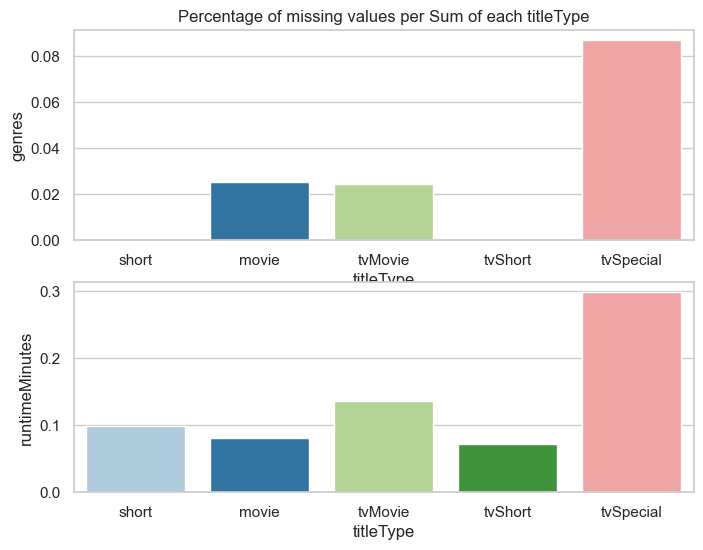

In [30]:
# Plot to see the distribution of missing values by titleType 
# Here we choose to handle the column 'genres' first
# Have a look on distribution of missing values
f, axes = plt.subplots(2,1,figsize = (8,6))

sns.set(style='whitegrid')
sns.set_palette('Paired')

plt.subplot(2,1,1)
sns.barplot(
            y = tbr_staff['genres'].isnull(),
            x = tbr_staff ['titleType'], 
            errorbar=None
           ).set_title("Percentage of missing values per Sum of each titleType")

plt.subplot(2,1,2)
sns.barplot(
            y = tbr_staff['runtimeMinutes'].isnull(),
            x = tbr_staff['titleType'], 
            errorbar=None
            )

plt.show();


# 

# Analyzing 'genres' of tvSpecial - Remove this type of title

We cut the data of each titleType into 2: one has only null values, one without null value and we will analyze each of them to find the solution for 'fillna'

In [9]:
# So we have 941 titles without genres
# and 9870 titles with genres
# Let's check it out how is the genres distribute in this type of title
tvspec_nona =  tbr_staff[(tbr_staff['titleType'] == 'tvSpecial') &
                       (~tbr_staff['genres'].isnull()) ]

tvspec = df[df['titleType'] == 'tvSpecial']

Try to understand the logic of each genres in this titleType 'tvSpecial'
So we have type of genres similar to movie and tvmovie's ones. But, if we try to search keyword from primaryTitle, we will see the logic is different from movie and tvmovie's ones. For exemple, With the typ of genres 'Comedy', it's about a comedy talked-Show in 'tvSpecial' while  it's a comedy movie in 'tvMovie' and 'movie'.

In [6]:
tvspec_nona['genres'].apply(
    lambda x: list(x.split(','))
                            ).explode().value_counts()

genres
Comedy         3396
Music          2734
Documentary    1884
Sport          1667
Action          649
Family          583
Reality-TV      499
News            267
Talk-Show       238
Short           189
Drama           162
Musical         161
Animation       157
Game-Show       138
History          99
Biography        94
Adventure        76
Fantasy          56
Crime            53
Horror           32
Romance          31
Sci-Fi           19
War              16
Mystery          16
Adult            14
Thriller          9
TV Movie          8
Western           2
Name: count, dtype: int64

In [16]:
# If we search for genres or characters of title we will see that the logic of setting genres in this titleType 
#is not related to movie which is our target
tvspec_nona.loc[tvspec_nona['genres'] == 'Comedy']
tvspec_nona.loc[tvspec_nona['genres'] == 'Music']
tvspec_nona[tvspec_nona['primaryTitle'].str.contains('Show')]
tvspec_nona[tvspec_nona['primaryTitle'].str.contains('Awards')] 
tvspec_nona[tvspec_nona['primaryTitle'].str.contains('Concert')]

Unnamed: 0    index      tconst  averageRating  numVotes  titleType  \
180146      180146   365304   tt0837109            8.9        11  tvSpecial   
210919      210919   498744  tt11713502            5.6        17  tvSpecial   
213009      213009   506628  tt11868708            5.4        65  tvSpecial   
232040      232040   577678  tt13399612            7.3        71  tvSpecial   
232041      232041   577683  tt13399630            6.9        21  tvSpecial   
236736      236736   592004  tt13691534            6.4         6  tvSpecial   
240538      240538   604180  tt13970100            6.7        32  tvSpecial   
243622      243622   614505  tt14198526            6.2       115  tvSpecial   
244956      244956   619420  tt14308698            6.6       116  tvSpecial   
248821      248821   633239  tt14611958            7.4        25  tvSpecial   
263850      263850   684340  tt15822940            7.0        16  tvSpecial   
295334      295334   783002  tt20255454            5.9         7  tvSpecial   
295924      295924   784920  tt20412612            6.7        48  tvSpecial   
330688      330688   893046  tt26753485            7.6        73  tvSpecial   
330753      330753   893287  tt26760974            8.0        37  tvSpecial   
331005      331005   894192  tt26849851            5.8       217  tvSpecial   
337579      337579   919657  tt28268408            7.6        20  tvSpecial   
346935      346935   953005  tt30749490            6.2         5  tvSpecial   
440223      440223  1257071   tt8693400            8.2        27  tvSpecial   

                                             primaryTitle  \
180146                    Party Police: Wild on the Water   
210919                              Crime Patrol dial 100   
213009               Catching a Serial Killer: Sam Little   
232040             Jessica Chambers: An ID Murder Mystery   
232041   Murder in Ypsilanti: Keith Morrison Investigates   
236736              Preppy Killer: My Friend the Murderer   
240538                                   A Spy in the FBI   
243622                  Down the Hill: The Delphi Murders   
244956  Rifkin on Rifkin: Private Confessions of a Ser...   
248821                                    The Murder List   
263850            Predator: Catching the Black Cab Rapist   
295334                                            Jajabor   
295924                              Murdered for Millions   
330688              Homicide Hunter: The Man with No Face   
330753                 O.J. Simpson: Blood, Lies & Murder   
331005                          The Idaho College Murders   
337579                  What Happened to Valentino Dixon?   
346935         Doomsday: The Trial of Lori Vallow Daybell   
440223                       Snapped Notorious: Ted Bundy   

                                            originalTitle  isAdult  startYear  \
180146                    Party Police: Wild on the Water      0.0     2006.0   
210919                              Crime Patrol dial 100      0.0     2018.0   
213009               Catching a Serial Killer: Sam Little      0.0     2020.0   
232040             Jessica Chambers: An ID Murder Mystery      0.0     2020.0   
232041   Murder in Ypsilanti: Keith Morrison Investigates      0.0     2020.0   
236736              Preppy Killer: My Friend the Murderer      0.0     2021.0   
240538                                   A Spy in the FBI      0.0     2021.0   
243622                  Down the Hill: The Delphi Murders      0.0     2020.0   
244956  Rifkin on Rifkin: Private Confessions of a Ser...      0.0     2021.0   
248821                                    The Murder List      0.0     2021.0   
263850            Predator: Catching the Black Cab Rapist      0.0     2021.0   
295334                                            Jajabor      0.0     2022.0   
295924                              Murdered for Millions      0.0     2022.0   
330688              Homicide Hunter: The Man with No Face      0.0     2

We decide to remove this titleType

In [3]:
tbr_staff = tbr_staff.loc[tbr_staff['titleType'] != 'tvSpecial']
df = tbr_staff[tbr_staff['genres'].isnull()]

In [5]:
tbr_staff.isnull().sum()

Unnamed: 0            0
index                 0
tconst                0
averageRating         0
numVotes              0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear            38
runtimeMinutes    40815
genres             7492
dtype: int64

In [4]:
tbr_staff.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvShort'], dtype=object)

In [6]:
# df before filling runtime
tbr_staff = pd.read_csv("tbr_staff_440411rows_28052024.csv")

#

# Replace NaN of 'runtimeMinutes' by using median of each 'titleType'

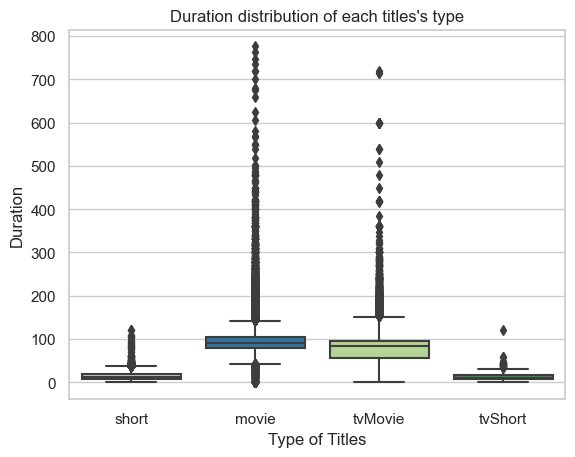

In [21]:
tbr_staff = tbr_staff.loc[tbr_staff['runtimeMinutes'] < 800.0 ]

sns.set(style='whitegrid')
sns.set_palette('Paired')

ax = sns.boxplot( y = tbr_staff['runtimeMinutes'],
                 x = tbr_staff ['titleType'])
ax.set_title("Duration distribution of each titles's type")
ax.set_ylabel("Duration")
ax.set_xlabel("Type of Titles")
plt.show();

# tvShort

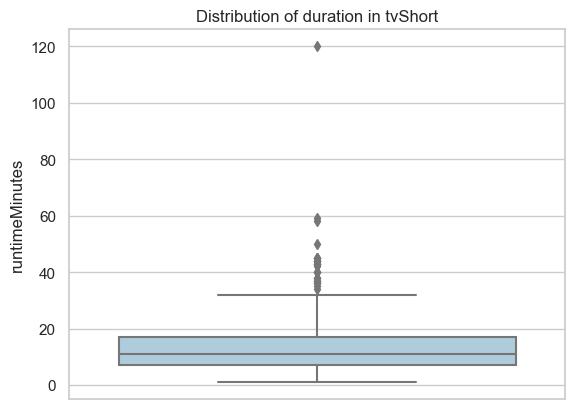

In [26]:
# Create df tvShort
tvshort =  tbr_staff[tbr_staff['titleType'] == 'tvShort']

# Check distribution of the target column 
sns.set(style='whitegrid')
sns.set_palette('Paired')
sns.boxplot(y = tvshort['runtimeMinutes']).set_title('Distribution of duration in tvShort')
plt.show();

In [27]:
# Calculate interquartile range of tvShort
q1_1 = tvshort['runtimeMinutes'].quantile(0.25)
q3_1 = tvshort['runtimeMinutes'].quantile(0.75)
iqr_1 = q3_1 - q1_1

# Calculate duration's median of tvShort
tvshort_median = tvshort.loc[tvshort['runtimeMinutes'] < q3_1 + 1.5*iqr_1, 'runtimeMinutes'].median()

# Fill mising value
tbr_staff.loc[(tbr_staff['titleType'] == 'tvShort') &
            (tbr_staff['runtimeMinutes'].isnull()), 
              'runtimeMinutes'] = tvshort_median

In [28]:
tbr_staff.loc[(tbr_staff['titleType'] == 'tvShort') &
            (tbr_staff['runtimeMinutes'].isnull())]

Empty DataFrame
Columns: [tconst, averageRating, numVotes, titleType, primaryTitle, isAdult, startYear, runtimeMinutes, genres]
Index: []

# short

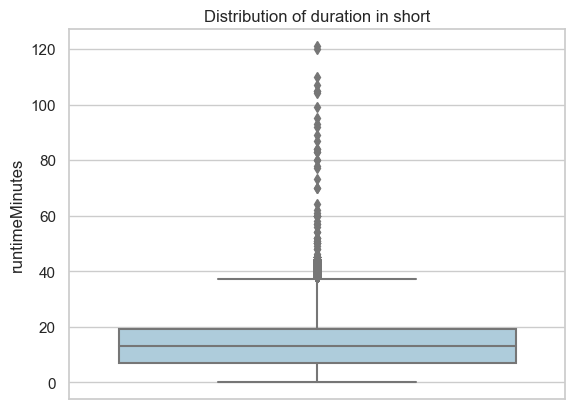

In [29]:
# Create df short
short =  tbr_staff[tbr_staff['titleType'] == 'short']

# Check distribution of the target column 
sns.set(style='whitegrid')
sns.set_palette('Paired')

sns.boxplot(y = short['runtimeMinutes']).set_title('Distribution of duration in short')
plt.show();

In [31]:
# Calculate interquartile range of short
q1_2 = short['runtimeMinutes'].quantile(0.25)
q3_2 = short['runtimeMinutes'].quantile(0.75)
iqr_2 = q3_2 - q1_2

# Calculate duration's median of short
short_median = short.loc[short['runtimeMinutes'] < q3_2 + 1.5*iqr_2, 'runtimeMinutes'].median()

# Fill mising value
tbr_staff.loc[(tbr_staff['titleType'] == 'short') &
            (tbr_staff['runtimeMinutes'].isnull()), 
              'runtimeMinutes'] = short_median

In [32]:
tbr_staff.loc[(tbr_staff['titleType'] == 'short') &
            (tbr_staff['runtimeMinutes'].isnull())]

Empty DataFrame
Columns: [tconst, averageRating, numVotes, titleType, primaryTitle, isAdult, startYear, runtimeMinutes, genres]
Index: []

#  tvMovie

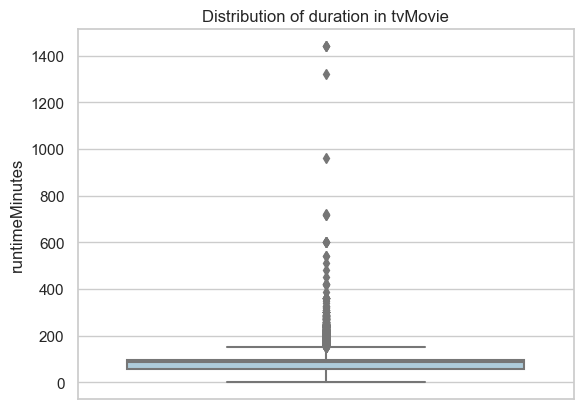

In [33]:
# Create df tvMovie
tvMovie =  tbr_staff[tbr_staff['titleType'] == 'tvMovie']

# Check distribution of the target column 
sns.set(style='whitegrid')
sns.set_palette('Paired')

sns.boxplot(y = tvMovie['runtimeMinutes']).set_title('Distribution of duration in tvMovie')
plt.show();

In [37]:
# Calculate interquartile range of tvMovie
q1_3 = tvMovie['runtimeMinutes'].quantile(0.25)
q3_3 = tvMovie['runtimeMinutes'].quantile(0.75)
iqr_3 = q3_3 - q1_3

# Calculate duration's median of tvMovie
tvMovie_median = tvMovie.loc[tvMovie['runtimeMinutes'] < q3_3 + 1.5*iqr_3, 'runtimeMinutes'].median()

# Fill mising value
tbr_staff.loc[(tbr_staff['titleType'] == 'tvMovie') &
            (tbr_staff['runtimeMinutes'].isnull()), 
              'runtimeMinutes'] = tvMovie_median

In [38]:
tbr_staff.loc[(tbr_staff['titleType'] == 'tvMovie') &
            (tbr_staff['runtimeMinutes'].isnull())] 

Empty DataFrame
Columns: [tconst, averageRating, numVotes, titleType, primaryTitle, isAdult, startYear, runtimeMinutes, genres]
Index: []

# movie

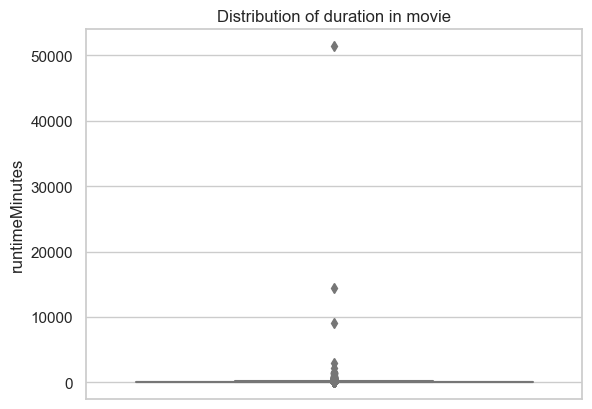

In [39]:
# Create df movie
movie =  tbr_staff[tbr_staff['titleType'] == 'movie']

# Check distribution of the target column 
sns.set(style='whitegrid')
sns.set_palette('Paired')

sns.boxplot(y = movie['runtimeMinutes']).set_title('Distribution of duration in movie')
plt.show();

In [42]:
# Calculate interquartile range of tvMovie
q1_4 = movie['runtimeMinutes'].quantile(0.25)
q3_4 = movie['runtimeMinutes'].quantile(0.75)
iqr_4 = q3_4 - q1_4

# Calculate duration's median of tvMovie
movie_median = movie.loc[movie['runtimeMinutes'] < q3_4 + 1.5*iqr_4, 'runtimeMinutes'].median()

# Fill mising value
tbr_staff.loc[(tbr_staff['titleType'] == 'movie') &
            (tbr_staff['runtimeMinutes'].isnull()), 
              'runtimeMinutes'] = movie_median

In [43]:
tbr_staff.loc[(tbr_staff['titleType'] == 'movie') &
            (tbr_staff['runtimeMinutes'].isnull())] 

Empty DataFrame
Columns: [tconst, averageRating, numVotes, titleType, primaryTitle, isAdult, startYear, runtimeMinutes, genres]
Index: []

In [48]:
tbr_staff.isnull().sum()

tconst               0
averageRating        0
numVotes             0
titleType            0
primaryTitle         0
isAdult              0
startYear           38
runtimeMinutes       0
genres            7492
dtype: int64

#

# Replace NaN of 'startYear'

In [51]:
# Retieve list of tconst which have missing value in column 'startYear' 
missing = tbr_staff.loc[tbr_staff['startYear'].isnull()]
missing['tconst'].tolist()

['tt0149801',
 'tt0203086',
 'tt0226507',
 'tt0257581',
 'tt0417131',
 'tt10117204',
 'tt10256102',
 'tt10515986',
 'tt10654244',
 'tt10800870',
 'tt11147610',
 'tt12875634',
 'tt13106696',
 'tt15028398',
 'tt15909296',
 'tt19048756',
 'tt20117552',
 'tt20234128',
 'tt2056526',
 'tt2075291',
 'tt21272560',
 'tt21302390',
 'tt21327150',
 'tt21330052',
 'tt21345892',
 'tt21622978',
 'tt21662022',
 'tt22482736',
 'tt5004912',
 'tt6295586',
 'tt7497036',
 'tt7539144',
 'tt7919550',
 'tt9013026',
 'tt9437346',
 'tt9593410',
 'tt9623504',
 'tt9710724']

In [53]:
# Fill NaN of column 'startYear': 'titleType' == 'movie'
# Combine 2 lists into a dictionary then use map to fill nan by tconst
# Notice the order of each value in two columns






startYear = [1942, 2001, 1992, 1963, 1983, 2020,
             2018, 2021, 2019, 2019, 2021, 2015,
             2022, 2022, 2022, 2022, 2021, 2023,
             2021, 2016, 2022, 2021, 2022, 2022, 
             2022, 2022, 2022, 2022, 2021, 2014,
             2018, 2018, 2017, 2021, 2018, 2019,
             2017, 2023]  
         
fill_year = {tconst[i]: startYear[i] for i in range(len(tconst))}

tbr_staff['startYear'] = tbr_staff['startYear'].fillna(tbr_staff['tconst'].map(fill_year))

In [54]:
tbr_staff.isnull().sum()

tconst               0
averageRating        0
numVotes             0
titleType            0
primaryTitle         0
isAdult              0
startYear            0
runtimeMinutes       0
genres            7492
dtype: int64

In [2]:
tbr_staff = pd.read_csv('tbr_staff_fillnan_440411rows_28052024.csv')

#

# Replace NaN of 'genres'

Merge with 2 datasets 'title.principal' and 'name.basics' to get infos of staffs

In [11]:
principal = pd.read_csv('title.principals.tsv', sep = '\t', usecols= ['tconst', 'nconst', 'category'])
staff = principal[principal['tconst'].isin(tbr_staff['tconst'])]
lst_principal = ['actress', 'actor', 'director', 'writer', 'cinematographer', 'composer', 'producer', 'editor', 'self']
staff_prin = staff[staff['category'].isin(lst_principal)]
staff_prin.head(3)

tconst     nconst  category
0  tt0000001  nm1588970      self
1  tt0000001  nm0005690  director
2  tt0000001  nm0005690  producer

In [10]:
missing_values = ['na','--','?','-','None','none','non', '\\N']
staff_name = pd.read_csv('name.basics.tsv', sep = '\t', usecols=['nconst','primaryName'], na_values=missing_values)
staff_principal = pd.merge(staff_prin, staff_name, how='left', on='nconst')
staff_principal.head(3)

tconst     nconst  category           primaryName
0  tt0000001  nm1588970      self            Carmencita
1  tt0000001  nm0005690  director  William K.L. Dickson
2  tt0000001  nm0005690  producer  William K.L. Dickson

In [12]:
sp_name = staff_principal.groupby(['tconst', 
                                   'category']).agg(**{
                                                        'staffName': 
                                                        ('primaryName', 
                                                        lambda x: ','.join(x))
                                                       }).reset_index()
sp_name.head(3)

tconst         category             staffName
0  tt0000001  cinematographer         William Heise
1  tt0000001         director  William K.L. Dickson
2  tt0000001         producer  William K.L. Dickson

In [13]:
df_final = sp_name.pivot_table(index=['tconst'],
                              columns='category',
                              values='staffName',
                              aggfunc=lambda x: ' '.join(x),
                              fill_value='NaN').reset_index()
print(sp_name.info())
df_final.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802607 entries, 0 to 2802606
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   category   object
 2   staffName  object
dtypes: object(3)
memory usage: 64.1+ MB
None


category     tconst actor actress cinematographer       composer  \
0         tt0000001   NaN     NaN   William Heise            NaN   
1         tt0000002   NaN     NaN             NaN  Gaston Paulin   
2         tt0000003   NaN     NaN             NaN  Gaston Paulin   

category              director        editor                    producer  \
0         William K.L. Dickson           NaN        William K.L. Dickson   
1                Émile Reynaud           NaN                         NaN   
2                Émile Reynaud  Tamara Pappé  Julien Pappé,Émile Reynaud   

category        self writer  
0         Carmencita    NaN  
1                NaN    NaN  
2                NaN    NaN

In [17]:
final = tbr_staff.merge(df_final, how='left', on='tconst')
final.head(3)

tconst  averageRating  numVotes titleType            primaryTitle  \
0  tt0000001            5.7      2051     short              Carmencita   
1  tt0000002            5.7       275     short  Le clown et ses chiens   
2  tt0000003            6.5      2007     short          Pauvre Pierrot   

   isAdult  startYear  runtimeMinutes                    genres actor actress  \
0      0.0     1894.0             1.0         Documentary,Short   NaN     NaN   
1      0.0     1892.0             5.0           Animation,Short   NaN     NaN   
2      0.0     1892.0             5.0  Animation,Comedy,Romance   NaN     NaN   

  cinematographer       composer              director        editor  \
0   William Heise            NaN  William K.L. Dickson           NaN   
1             NaN  Gaston Paulin         Émile Reynaud           NaN   
2             NaN  Gaston Paulin         Émile Reynaud  Tamara Pappé   

                     producer        self writer  
0        William K.L. Dickson  Carmencita    NaN  
1                         NaN         NaN    NaN  
2  Julien Pappé,Émile Reynaud         NaN    NaN

In [27]:
total_final = final.loc[final['genres'].notnull()]
total_final

tconst  averageRating  numVotes titleType            primaryTitle  \
0       tt0000001            5.7      2051     short              Carmencita   
1       tt0000002            5.7       275     short  Le clown et ses chiens   
2       tt0000003            6.5      2007     short          Pauvre Pierrot   
3       tt0000004            5.4       179     short             Un bon bock   
4       tt0000005            6.2      2770     short        Blacksmith Scene   
...           ...            ...       ...       ...                     ...   
432914  tt9916460            8.9        19   tvMovie               Pink Taxi   
432915  tt9916538            8.6         7     movie     Kuambil Lagi Hatiku   
432916  tt9916544            6.8        70     short         My Sweet Prince   
432917  tt9916706            7.6         5     movie         Dankyavar Danka   
432918  tt9916730            7.0        12     movie                  6 Gunn   

        isAdult  startYear  runtimeMinutes                    genres  \
0           0.0     1894.0             1.0         Documentary,Short   
1           0.0     1892.0             5.0           Animation,Short   
2           0.0     1892.0             5.0  Animation,Comedy,Romance   
3           0.0     1892.0            12.0           Animation,Short   
4           0.0     1893.0             1.0              Comedy,Short   
...         ...        ...             ...                       ...   
432914      0.0     2019.0            10.0                    Comedy   
432915      0.0     2019.0           123.0                     Drama   
432916      0.0     2019.0            12.0               Drama,Short   
432917      0.0     2013.0            90.0                    Comedy   
432918      0.0     2017.0           116.0                     Drama   

                                                    actor  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                 Charles Kayser,John Ott   
...                                                   ...   
432914  Argiris Tafralidis,Apostolos Tsamis,Giorgos Ve...   
432915  Sahil Shah,Dian Sidik,Dimas Aditya,Ence Bagus,...   
432916  Yoni Roodner,Jacob Avery,Rio Thake,Oliver Bick...   
432917  Makarand Anaspure,Anvay Bendre,Prakash Dhotre,...   
432918  Devadhar Archit,Sunil Barve,Ganesh Vasant Pati...   

                                                 actress  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
432914                              Christina Tafralidou   
432915  Lala Karmela,Cut Mini Theo,Ria Irawan,Yati Pesek   
432916                     Aoife Checkland,Sophie Oliver   
432917      Ashwini Ekbote,Suvarna Kale,Mukta Patwardhan   
432918                      Aarti Solanki,Amruta Subhash   

                    cinematographer         composer              director  \
0                     William Heise              NaN  William K.L. Dickson   
1                               NaN    Gaston Paulin         Émile Reynaud   
2                               NaN    Gaston Paulin         Émile Reynaud   
3                               NaN    Gaston Paulin         Émile Reynaud   
4                               NaN              NaN                   NaN   
...                             ...              ...                   ...   
432914             Theo Vavdinoudis              NaN    Gabriel Athanasiou   
432915                  Amalia T.S.     Dave Lumenta     Azhar Kinoi Lubis   
432916               Anna Mac

In [35]:
# Check NaN of each secondary feature 
df = total_final.copy()
print("Total missing values of 'actor':" , df.actor.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'actress':" , df.actress.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'cinematographer':" , df.cinematographer.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'composer':" , df.composer.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'director':" , df.director.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'editor':" , df.editor.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'self':" , df.self.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'producer':" , df.producer.isnull().sum(), "titles on 432.919 titles\n\n")
print("Total missing values of 'writer':" , df.writer.isnull().sum(), "titles on 432.919 titles\n\n")

Total missing values of 'actor': 83435 titles on 432.919 titles


Total missing values of 'actress': 118666 titles on 432.919 titles


Total missing values of 'cinematographer': 88353 titles on 432.919 titles


Total missing values of 'composer': 164834 titles on 432.919 titles


Total missing values of 'director': 13398 titles on 432.919 titles


Total missing values of 'editor': 100028 titles on 432.919 titles


Total missing values of 'self': 382748 titles on 432.919 titles


Total missing values of 'producer': 113533 titles on 432.919 titles


Total missing values of 'writer': 68793 titles on 432.919 titles




In [45]:
# Remove 2030 entries which are titles without principal staff
df1 = df.loc[df['actor'].isnull() &
       df['actress'].isnull() &
       df['director'].isnull() &
       df['producer'].isnull() &
       df['self'].isnull()]

df = df.loc[~df['tconst'].isin(df1['tconst'])]

# Drop 3 not very important features
df = df.drop(columns=['cinematographer', 'composer', 'editor'], axis=1)

In [2]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430889 entries, 0 to 430888
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          430889 non-null  object 
 1   averageRating   430889 non-null  float64
 2   numVotes        430889 non-null  int64  
 3   titleType       430889 non-null  object 
 4   primaryTitle    430889 non-null  object 
 5   isAdult         430889 non-null  float64
 6   startYear       430889 non-null  float64
 7   runtimeMinutes  430889 non-null  float64
 8   genres          430889 non-null  object 
 9   actor           349484 non-null  object 
 10  actress         314253 non-null  object 
 11  director        419521 non-null  object 
 12  producer        319386 non-null  object 
 13  self            50171 non-null   object 
 14  writer          363875 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 49.3+ MB
None


tconst  averageRating  numVotes titleType            primaryTitle  \
0       tt0000001            5.7      2051     short              Carmencita   
1       tt0000002            5.7       275     short  Le clown et ses chiens   
2       tt0000003            6.5      2007     short          Pauvre Pierrot   
3       tt0000004            5.4       179     short             Un bon bock   
4       tt0000005            6.2      2770     short        Blacksmith Scene   
...           ...            ...       ...       ...                     ...   
430884  tt9916460            8.9        19   tvMovie               Pink Taxi   
430885  tt9916538            8.6         7     movie     Kuambil Lagi Hatiku   
430886  tt9916544            6.8        70     short         My Sweet Prince   
430887  tt9916706            7.6         5     movie         Dankyavar Danka   
430888  tt9916730            7.0        12     movie                  6 Gunn   

        isAdult  startYear  runtimeMinutes                    genres  \
0           0.0     1894.0             1.0         Documentary,Short   
1           0.0     1892.0             5.0           Animation,Short   
2           0.0     1892.0             5.0  Animation,Comedy,Romance   
3           0.0     1892.0            12.0           Animation,Short   
4           0.0     1893.0             1.0              Comedy,Short   
...         ...        ...             ...                       ...   
430884      0.0     2019.0            10.0                    Comedy   
430885      0.0     2019.0           123.0                     Drama   
430886      0.0     2019.0            12.0               Drama,Short   
430887      0.0     2013.0            90.0                    Comedy   
430888      0.0     2017.0           116.0                     Drama   

                                                    actor  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                 Charles Kayser,John Ott   
...                                                   ...   
430884  Argiris Tafralidis,Apostolos Tsamis,Giorgos Ve...   
430885  Sahil Shah,Dian Sidik,Dimas Aditya,Ence Bagus,...   
430886  Yoni Roodner,Jacob Avery,Rio Thake,Oliver Bick...   
430887  Makarand Anaspure,Anvay Bendre,Prakash Dhotre,...   
430888  Devadhar Archit,Sunil Barve,Ganesh Vasant Pati...   

                                                 actress  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
430884                              Christina Tafralidou   
430885  Lala Karmela,Cut Mini Theo,Ria Irawan,Yati Pesek   
430886                     Aoife Checkland,Sophie Oliver   
430887      Ashwini Ekbote,Suvarna Kale,Mukta Patwardhan   
430888                      Aarti Solanki,Amruta Subhash   

                    director                       producer        self  \
0       William K.L. Dickson           William K.L. Dickson  Carmencita   
1              Émile Reynaud                            NaN         NaN   
2              Émile Reynaud     Julien Pappé,Émile Reynaud         NaN   
3              Émile Reynaud                            NaN         NaN   
4                        NaN               Thomas A. Edison         NaN   
...                      ...                            ...         ...   
430884    Gabriel Athanasiou                            NaN         NaN   
430885     Azhar Kinoi Lubis    Salman Aristo,M. Abduh Aziz         NaN   
430886        Jason Bradbury                  Grace Carr